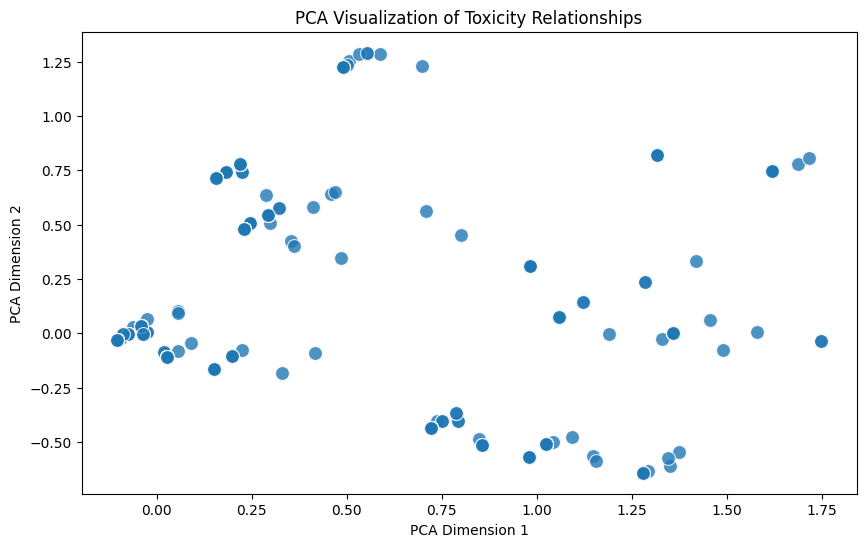

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tox21_data = pd.read_csv('data/tox21.csv')

# Select columns related to toxicity assays
toxicity_columns = [
    "NR-AR", "SR-HSE", "NR-Aromatase", "NR-ER-LBD", "NR-AhR",
    "SR-MMP", "NR-ER", "NR-PPAR-gamma", "SR-p53", "SR-ATAD5", "NR-AR-LBD"
]
toxicity_data = tox21_data[toxicity_columns].dropna()  # Drop rows with missing values

# Apply PCA to toxicity data
pca = PCA(n_components=2)
pca_results = pca.fit_transform(toxicity_data)

# Add PCA results back to the dataframe
toxicity_data["PCA1"] = pca_results[:, 0]
toxicity_data["PCA2"] = pca_results[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=toxicity_data, x="PCA1", y="PCA2", s=100, alpha=0.8)
plt.title("PCA Visualization of Toxicity Relationships")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()


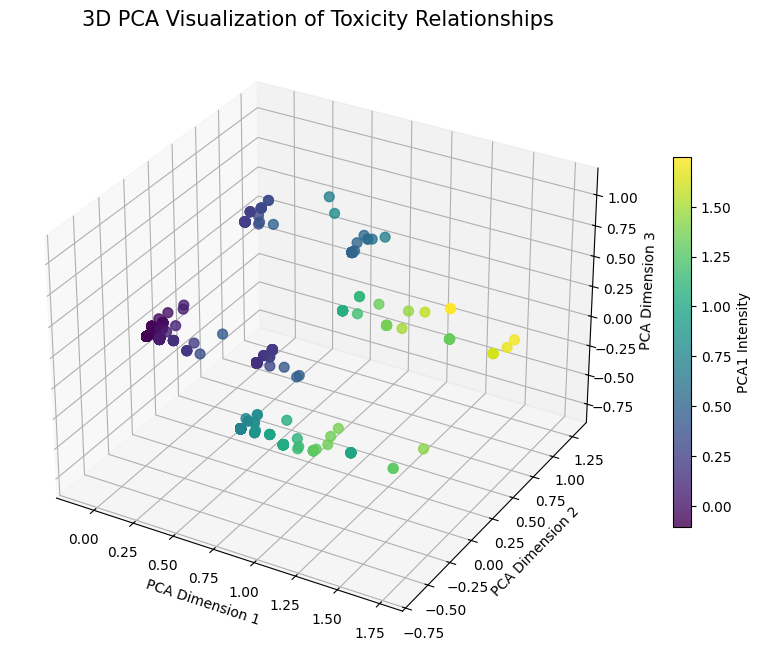

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for 3 components
pca_3d = PCA(n_components=3)
pca_results_3d = pca_3d.fit_transform(toxicity_data[toxicity_columns])

# Add 3D PCA results to the dataframe
toxicity_data["PCA3"] = pca_results_3d[:, 2]

# Plot the 3D PCA results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    toxicity_data["PCA1"], toxicity_data["PCA2"], toxicity_data["PCA3"],
    c=toxicity_data["PCA1"], cmap='viridis', s=50, alpha=0.8
)

ax.set_title("3D PCA Visualization of Toxicity Relationships", fontsize=15)
ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_zlabel("PCA Dimension 3")
plt.colorbar(sc, ax=ax, shrink=0.6, label='PCA1 Intensity')
plt.show()


,MolecularWeight,LogP,HBD,HBA,TPSA,MorganFP,MACCSFP,AverageDegree,Density,ClusteringCoefficient,...,Node2Vec54,Node2Vec55,Node2Vec56,Node2Vec57,Node2Vec58,Node2Vec59,Node2Vec60,Node2Vec61,Node2Vec62,Node2Vec63
0,468.992,1.53830,4,5,120.85,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.176471,0.065954,0.0,...,0.435621,0.241321,0.221496,-0.158212,-0.090850,-0.250329,0.124108,-0.328297,-0.135501,0.054109
1,691.859,-0.94010,0,5,93.40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.064516,0.068817,0.0,...,0.222662,0.174278,0.109293,-0.302819,-0.073712,-0.034830,0.250024,-0.127890,0.041568,0.148315
2,934.171,3.35840,4,17,248.08,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.153846,0.033654,0.0,...,0.149516,0.297842,-0.069042,-0.164666,-0.284907,0.295488,0.217687,-0.307906,-0.026188,0.158494
3,927.020,3.58460,4,10,241.96,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.029412,0.030290,0.0,...,0.033090,0.207413,0.224814,-0.148151,-0.171297,0.250694,0.136850,-0.532968,0.244031,-0.016513
4,1342.527,-0.45963,18,15,482.13,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.123711,0.022122,0.0,...,0.115340,0.343460,0.102978,0.147940,-0.081771,0.312810,-0.071070,-0.457291,0.168834,-0.363484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8034,230.442,5.03320,0,2,0.00,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",2.142857,0.164835,0.0,...,0.169195,-0.172202,-0.093258,-0.162695,-0.121084,0.172289,0.042527,-0.181909,-0.081742,0.121211
8035,206.097,2.62760,1,1,26.02,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.000000,0.200000,0.0,...,0.157132,-0.100585,0.031901,-0.262540,-0.005662,0.084377,0.164738,-0.166892,-0.117290,0.088115
8036,76.145,1.01810,0,2,0.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.333333,0.666667,0.0,...,0.174236,-0.171165,0.119210,-0.193017,0.026750,-0.076247,0.080412,-0.029116,-0.108234,-0.108389
8037,102.162,-0.53590,2,1,24.06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.000000,0.400000,0.0,...,0.221625,-0.131184,0.073779,-0.188573,0.099642,-0.086453,0.081252,-0.076300,-0.224117,-0.025987


In [10]:
import pandas as pd

# Load the dataset
tox21_data = pd.read_csv('data/tox21.csv')

# Drop rows with missing values in key columns
tox21_data = tox21_data.dropna(subset=['SMILES'])

# Optional: Select a subset of data for faster computation during development
# tox21_data = tox21_data.sample(n=1000, random_state=42).reset_index(drop=True)





In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

def smiles_to_morgan(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.nan
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return np.array(fp)

# Generate fingerprints
tox21_data['Fingerprint'] = tox21_data['SMILES'].apply(smiles_to_morgan)

# Remove molecules where fingerprint generation failed
tox21_data = tox21_data.dropna(subset=['Fingerprint']).reset_index(drop=True)

[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerator
[18:21:56] DEPRECATION WARNING: please use MorganGenerat

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the fingerprint matrix
fingerprint_matrix = np.stack(tox21_data['Fingerprint'].values)

# Optional: Scale the data
scaler = StandardScaler()
fingerprint_scaled = scaler.fit_transform(fingerprint_matrix)

# Choose the number of clusters (e.g., 5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tox21_data['Cluster'] = kmeans.fit_predict(fingerprint_scaled)


C:\Users\vmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoun

In [13]:
# List of toxicity assay columns
toxicity_columns = [
    "NR-AR", "SR-HSE", "NR-Aromatase", "NR-ER-LBD", "NR-AhR",
    "SR-MMP", "NR-ER", "NR-PPAR-gamma", "SR-p53", "SR-ATAD5", "NR-AR-LBD"
]

# Replace missing toxicity values with zeros or another strategy
tox21_data[toxicity_columns] = tox21_data[toxicity_columns].fillna(0)

# Calculate the mean toxicity for each cluster
cluster_toxicity = tox21_data.groupby('Cluster')[toxicity_columns].mean()
print(cluster_toxicity)


            NR-AR    SR-HSE  NR-Aromatase  NR-ER-LBD    NR-AhR    SR-MMP  \
Cluster                                                                    
0        0.032258  0.032258      0.516129   0.000000  0.258065  0.161290   
1        0.000000  0.032258      0.000000   0.000000  0.032258  0.000000   
2        0.000000  0.000000      0.000000   0.000000  0.500000  0.000000   
3        0.024845  0.043478      0.080745   0.018634  0.068323  0.248447   
4        0.039033  0.047351      0.036089   0.045303  0.097901  0.114666   

            NR-ER  NR-PPAR-gamma    SR-p53  SR-ATAD5  NR-AR-LBD  
Cluster                                                          
0        0.000000       0.000000  0.000000  0.000000   0.000000  
1        0.000000       0.032258  0.000000  0.000000   0.000000  
2        0.000000       0.000000  0.500000  0.000000   0.000000  
3        0.062112       0.049689  0.086957  0.012422   0.006211  
4        0.100973       0.023036  0.053238  0.033913   0.030330  


In [14]:
def predict_toxicity(smiles, kmeans_model, scaler, cluster_toxicity):
    # Generate fingerprint
    fp = smiles_to_morgan(smiles)
    if fp is np.nan:
        return "Invalid SMILES"
    
    # Scale fingerprint
    fp_scaled = scaler.transform([fp])
    
    # Predict cluster
    cluster_label = kmeans_model.predict(fp_scaled)[0]
    
    # Retrieve cluster toxicity profile
    toxicity_profile = cluster_toxicity.loc[cluster_label]
    
    return toxicity_profile

# Example SMILES of an unseen compound
unseen_smiles = 'CCO'

# Predict toxicity
toxicity_prediction = predict_toxicity(unseen_smiles, kmeans, scaler, cluster_toxicity)
print(f"Toxicity prediction for the compound {unseen_smiles}:")
print(toxicity_prediction)


Toxicity prediction for the compound CCO:
NR-AR            0.039033
SR-HSE           0.047351
NR-Aromatase     0.036089
NR-ER-LBD        0.045303
NR-AhR           0.097901
SR-MMP           0.114666
NR-ER            0.100973
NR-PPAR-gamma    0.023036
SR-p53           0.053238
SR-ATAD5         0.033913
NR-AR-LBD        0.030330
Name: 4, dtype: float64


[18:22:22] DEPRECATION WARNING: please use MorganGenerator


In [15]:
from sklearn.decomposition import PCA

# Reduce dimensionality before clustering
pca = PCA(n_components=50, random_state=42)
fingerprint_pca = pca.fit_transform(fingerprint_scaled)

# Clustering on reduced data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
tox21_data['Cluster_PCA'] = kmeans_pca.fit_predict(fingerprint_pca)

# Proceed with the same steps for cluster analysis and prediction


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

# Load the dataset
tox21_data = pd.read_csv('data/tox21.csv')

# Drop rows with missing SMILES
tox21_data = tox21_data.dropna(subset=['SMILES']).reset_index(drop=True)

# Define toxicity assay columns
toxicity_columns = [
    "NR-AR", "SR-HSE", "NR-Aromatase", "NR-ER-LBD", "NR-AhR",
    "SR-MMP", "NR-ER", "NR-PPAR-gamma", "SR-p53", "SR-ATAD5", "NR-AR-LBD"
]

# Fill missing toxicity labels with 0 (or another strategy, depending on your needs)
tox21_data[toxicity_columns] = tox21_data[toxicity_columns].fillna(0)

# Generate molecular fingerprints
def smiles_to_morgan(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.nan
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return np.array(fp)

tox21_data['Fingerprint'] = tox21_data['SMILES'].apply(smiles_to_morgan)

# Remove compounds with invalid fingerprints
tox21_data = tox21_data.dropna(subset=['Fingerprint']).reset_index(drop=True)

# Convert fingerprints to a numpy matrix
fingerprint_matrix = np.stack(tox21_data['Fingerprint'].values)


[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerator
[17:40:05] DEPRECATION WARNING: please use MorganGenerat

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the fingerprint data
scaler = StandardScaler()
fingerprint_scaled = scaler.fit_transform(fingerprint_matrix)

# Perform K-Means clustering
n_clusters = 10  # You can tune this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tox21_data['Cluster'] = kmeans.fit_predict(fingerprint_scaled)

# Compute average toxicity labels for each cluster
cluster_toxicity_profile = tox21_data.groupby('Cluster')[toxicity_columns].mean()


C:\Users\vmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoun

In [4]:
def predict_toxicity(smiles, kmeans_model, scaler, cluster_toxicity_profile):
    # Generate fingerprint
    fp = smiles_to_morgan(smiles)
    if fp is np.nan:
        return "Invalid SMILES"
    
    # Scale the fingerprint
    fp_scaled = scaler.transform([fp])
    
    # Predict cluster
    cluster_label = kmeans_model.predict(fp_scaled)[0]
    
    # Get toxicity profile for the assigned cluster
    predicted_toxicity = cluster_toxicity_profile.loc[cluster_label]
    
    return predicted_toxicity

# Example unseen SMILE
unseen_smiles = "CCO"
toxicity_prediction = predict_toxicity(unseen_smiles, kmeans, scaler, cluster_toxicity_profile)

print(f"Toxicity prediction for {unseen_smiles}:")
print(toxicity_prediction)


Toxicity prediction for CCO:
NR-AR            0.015334
SR-HSE           0.050987
NR-Aromatase     0.026452
NR-ER-LBD        0.041020
NR-AhR           0.092582
SR-MMP           0.118459
NR-ER            0.093349
NR-PPAR-gamma    0.021085
SR-p53           0.043512
SR-ATAD5         0.032969
NR-AR-LBD        0.013609
Name: 9, dtype: float64


[17:40:23] DEPRECATION WARNING: please use MorganGenerator


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Split data into training and test sets
train_data, test_data = train_test_split(tox21_data, test_size=0.2, random_state=42)

# Train clustering model on training data
fingerprint_scaled_train = scaler.fit_transform(np.stack(train_data['Fingerprint'].values))
kmeans_train = KMeans(n_clusters=n_clusters, random_state=42)
train_data['Cluster'] = kmeans_train.fit_predict(fingerprint_scaled_train)

# Compute toxicity profiles for training clusters
train_cluster_toxicity_profile = train_data.groupby('Cluster')[toxicity_columns].mean()

# Predict toxicity for test data
test_predictions = []
for smiles in test_data['SMILES']:
    test_predictions.append(predict_toxicity(smiles, kmeans_train, scaler, train_cluster_toxicity_profile))

# Convert predictions to binary (round off probabilities)
test_predictions_binary = np.round(test_predictions).astype(int)

# Evaluate accuracy or other metrics (depending on your application)
# Assuming test_data[toxicity_columns] contains binary ground-truth labels
accuracy = accuracy_score(test_data[toxicity_columns].values.flatten(), test_predictions_binary.flatten())
print(f"Model accuracy: {accuracy:.2f}")


[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerator
[17:40:36] DEPRECATION WARNING: please use MorganGenerat

Model accuracy: 0.94


[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerator
[17:40:39] DEPRECATION WARNING: please use MorganGenerat